In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG16
from keras.regularizers import l1, l2, l1_l2

Using TensorFlow backend.


In [3]:
import json
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

In [4]:
import pickle
import seaborn as sns
import pandas as pd

# Data Preprocessing

In [5]:
root = '/userhome/34/ljiang/deep_learning/A2/Datasets/cat_dog_car_bike/'
train_dir = os.path.join(root, 'train')
val_dir = os.path.join(root, 'val')
test_dir = os.path.join(root, 'test')

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [6]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure(1, figsize=(10, 10))
    plt.subplot(211)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(212)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

<hr>

# Q1: CNN Architecture (padding)

    1. A convolutional layer with 32 3 × 3 filters. 
    2. A max Pooling Layer with size 2 × 2.
    3. A convolutional layer with 64 3 × 3 filters. 
    4. A max Pooling Layer with size 2 × 2.
    5. A convolutional layer with 128 3 × 3 filters. 
    6. A max Pooling Layer with size 2 × 2.
    7. A convolutional layer with 128 3 × 3 filters. 
    8. A max Pooling Layer with size 2 × 2.
    9. A dense layer with 512 units.
    10. A dense layer with k units and softmax (aka cross entropy) loss function.

In [104]:
def determine_k_value():
    """Return k value."""
    #######
    k = 4
    #######
    return k


def build_cnn_architecture():
    """Return instance of keras.models.Sequential."""
    #######
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(150, 150, 3), padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='sigmoid'))
    model.add(layers.Dense(4, activation='softmax'))
    #######
    return model


def test_determine_k_value():
    k = determine_k_value()
    assert isinstance(k, int)
    print("\nPass.")


def test_build_cnn_architecture():
    model = build_cnn_architecture()
    assert isinstance(model, models.Sequential)
    print("\nPass.")
    
test_determine_k_value()
test_build_cnn_architecture()


Pass.

Pass.


# Q2: Trainning a small CNN from scratch (lr + relu)

    • loss function=crossentropy;
    • optimizer RMSprop with learning rate = 0.1;
    • metrics= accuracy;
    • Batch size for the training/validation generators (if you use them) =20; 
    • epochs=10.

In [7]:
def multiple_choice():
    """Choose the right answers (one or more) from multiple choices.
    Note: if you think a is the right answer, return a;
            if your think a, b are the right answers, return a, b; ect.
    """
    # Here are 4 choices
    a = "Training accuracy increases over time and this is a problem."
    b = "Validation accuracy does not increase over time and this is a problem."
    c = "Training loss decreases over time and this is a problem."
    d = "Validation loss does not decrease over time and this is a problem."
    return b, d


def modified_cnn():
    """Return instance of keras.models.Sequential
    This is similar to build_cnn_architecture() in q1.py; however, you have to compile your model with
    a proper loss function and optimizer.
    """
    #######
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(150, 150, 3), padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='sigmoid', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='sigmoid'))
    model.add(layers.Dense(4, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=0.1),
                  metrics=['acc'])
    #######
    return model


def test_multiple_choice():
    choice = multiple_choice()
    assert isinstance(choice, str) or isinstance(choice, tuple)
    print("\nPass.")


def test_modified_cnn():
    model = modified_cnn()
    assert isinstance(model, models.Sequential)
    if hasattr(model, "loss") and hasattr(model, "optimizer"):
        print("\nPass.")


test_multiple_choice()
test_modified_cnn()


Pass.

Pass.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 128)      

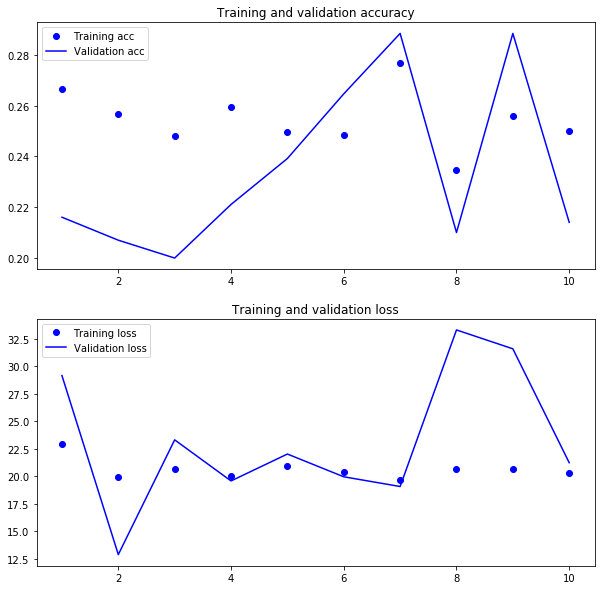

In [8]:
model_q2 = modified_cnn()

model_q2.summary()

history_q2 = model_q2.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)

plot_history(history_q2)

## change lr & relu

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_168 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_165 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_166 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_167 (MaxPoolin (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 15, 15, 128)     

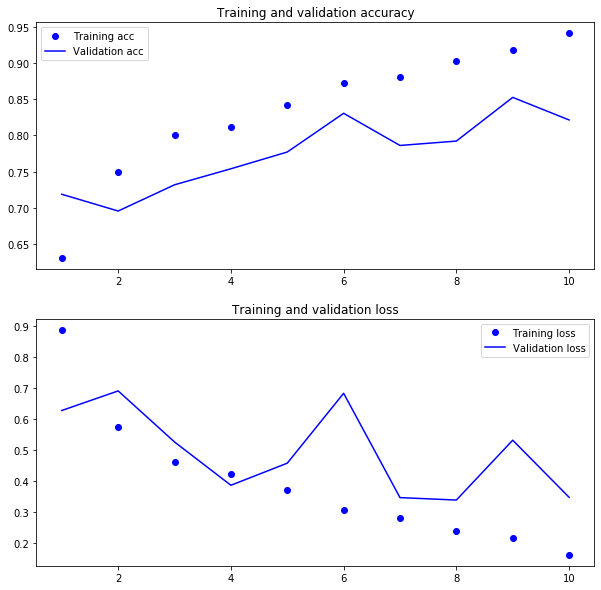

In [112]:
model_q2 = modified_cnn()

model_q2.summary()

history_q2 = model_q2.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)

plot_history(history_q2)

In [115]:
hs = {}
for lr in [1e-3, 1e-4, 1e-5]:
    print('#####', lr, '#####')
    model_q2 = modified_cnn(lr)
    hs[lr] = model_q2.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=val_generator,
        validation_steps=50)
    
hist = []
for lr in hs:
    for i in range(20):
        hist.append({
            'lr': lr,
            'epoch': i+1,
            'acc': hs[lr].history['acc'][i],
            'val_acc': hs[lr].history['val_acc'][i],
            'loss': hs[lr].history['loss'][i],
            'val_loss': hs[lr].history['val_loss'][i]
        })
df2 = pd.DataFrame(hist)

##### 0.001 #####
Epoch 1/20
100/100 [==============================] - 13s 134ms/step - loss: 1.0250 - acc: 0.5599 - val_loss: 0.3770 - val_acc: 0.7648
Epoch 2/20
100/100 [==============================] - 11s 114ms/step - loss: 0.5095 - acc: 0.7684 - val_loss: 0.5194 - val_acc: 0.7719
Epoch 3/20
100/100 [==============================] - 12s 116ms/step - loss: 0.3810 - acc: 0.8326 - val_loss: 0.2212 - val_acc: 0.8281
Epoch 4/20
100/100 [==============================] - 12s 116ms/step - loss: 0.3033 - acc: 0.8759 - val_loss: 0.5703 - val_acc: 0.8101
Epoch 5/20
100/100 [==============================] - 12s 115ms/step - loss: 0.2255 - acc: 0.9153 - val_loss: 0.6386 - val_acc: 0.8412
Epoch 6/20
100/100 [==============================] - 13s 133ms/step - loss: 0.1693 - acc: 0.9348 - val_loss: 0.4127 - val_acc: 0.8323
Epoch 7/20
100/100 [==============================] - 12s 115ms/step - loss: 0.1327 - acc: 0.9549 - val_loss: 0.9676 - val_acc: 0.8432
Epoch 8/20
100/100 [=================

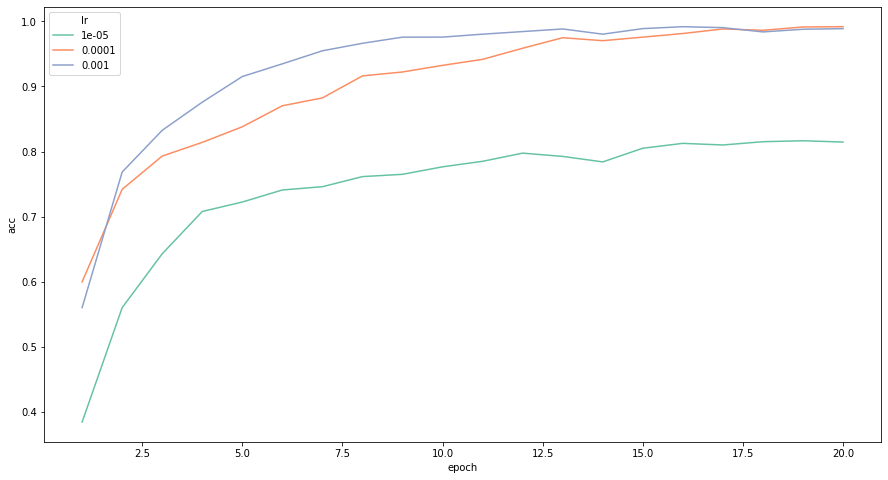

In [116]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='epoch', y='acc', hue='lr', data=df2, palette=sns.color_palette("Set2", 3))

# Q3: Optimize the learning rate

In [52]:
def learning_rate_range():
    """Give proper lower bound and upper bound for
    proper learning rate"""
    # Lower and upper bounds
    #######
    lower_bound, upper_bound = 0.1, 1e-9
    #######
    return lower_bound, upper_bound


def learnign_rate_examples():
    """Give three examples for a bad, not bad, and very good learning rate
    """
    #######
    bad_larning_rate = 0.1
    not_bad_learning_rate = 1e-4
    good_learning_rate = 1e-3
    #######
    return bad_larning_rate, not_bad_learning_rate, good_learning_rate


def test_learning_rate_range():
    lower, upper = learning_rate_range()
    assert isinstance(lower, float)
    assert isinstance(upper, float)
    print("\nPass.")


def test_learnign_rate_examples():
    bad_larning_rate, not_bad_learning_rate, good_learning_rate = learnign_rate_examples()
    assert isinstance(bad_larning_rate, float)
    assert isinstance(not_bad_learning_rate, float)
    assert isinstance(good_learning_rate, float)
    print("\nPass.")


test_learning_rate_range()
test_learnign_rate_examples()


Pass.

Pass.


# Q4: Transfer Learning

    Use the VGG16 as feature extractor with data augmentation (i.e. remove the top layer and freeze the VGGnet). Plot both the training/validation accuracy and training/validation loss as a function of the epochs (epochs=20) and submit the plots.

In [125]:
def transfer_learning_with_vggnet():
    """Return model built on pre-trained VGG16."""
    #######
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    for layer in conv_base.layers:
        layer.trainable = False
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])
    #######
    return model


def test_transfer_learning_with_vggnet():
    model = transfer_learning_with_vggnet()
    assert isinstance(model, models.Sequential)
    print("\nPass.")


test_transfer_learning_with_vggnet()


Pass.


In [160]:
# data augumentation
aug_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
aug_train_generator = aug_train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

model_q4 = transfer_learning_with_vggnet()

history_q4 = model_q4.fit_generator(
    aug_train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val_generator,
    validation_steps=50)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/20
100/100 [==============================] - 36s 362ms/step - loss: 1.0597 - acc: 0.7724 - val_loss: 0.1335 - val_acc: 0.8131
Epoch 2/20
100/100 [==============================] - 36s 357ms/step - loss: 0.3216 - acc: 0.8762 - val_loss: 0.0386 - val_acc: 0.9518
Epoch 3/20
100/100 [==============================] - 36s 358ms/step - loss: 0.2495 - acc: 0.9058 - val_loss: 0.0520 - val_acc: 0.8905
Epoch 4/20
100/100 [==============================] - 35s 345ms/step - loss: 0.2536 - acc: 0.9043 - val_loss: 0.0774 - val_acc: 0.9437
Epoch 5/20
100/100 [==============================] - 25s 252ms/step - loss: 0.2095 - acc: 0.9261 - val_loss: 0.0950 - val_acc: 0.9618
Epoch 6/20
100/100 [==============================] - 28s 277ms/step - loss: 0.1893 - acc: 0.9208 - val_loss: 0.1079 - val_acc: 0.9182
Epoch 7/20
100/100 [==============================] - 25s 251ms/step - loss: 0.1921 - acc: 0.9296 - val_los

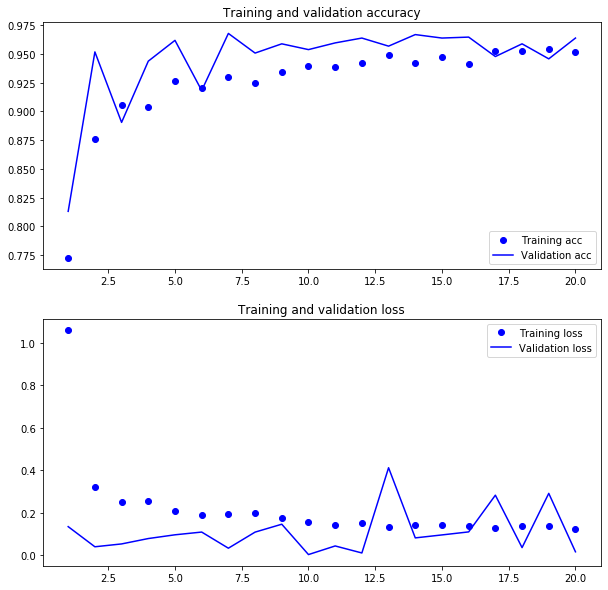

In [161]:
plot_history(history_q4)

# Q5: Open Question

In [ ]:
import json

def predict(test_dir, output_dir="q5_result"):
    """
    Args:
        - test_dir: test set directory, note that there are four sub-directories under this directory, i.e., c0, c1, c2, c3.
        - output_dir: output directory
    Important: Your model shall be stored in ``q5_model`` directory. Hence, in this function, you have to implement:
        1. Restore your model from ``q5_model``; and
        2. Make predictions for test set using the restored model.
            Your results will be stored in file named ``prediction.json`` under ``q5_result``.
            Make sure your results are formatted as dictionary, e.g., {"image_file_name": "label"}. See prediction.json for reference.
            You can save the results with json.dump.
        3. You can define your model architecture in this scripts.
    """
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    if not os.path.exists("q5_model"):
        raise Exception("Model not found.")

    ### Restore your model
    model = models.load_model('/userhome/34/ljiang/deep_learning/A2/ass2/q5_model')

    ### Make predictions with restored model
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        shuffle=False)
    predict = model.predict_classes(test_generator, batch_size=None)

    ### Convert predicted results to dictionary
    mapping = {
        0: 'cat',
        1: 'dog',
        2: 'car',
        3: 'motorbike'
    }
    result = {}
    for i in range(len(test_generator.filenames)):
        y = test_generator.filenames[i].split('/')[-1]
        y_predict = predict[i]
        result[y] = mapping[y_predict]

    ### Saved resutls to q5_result/prediction.json
    with open(os.path.join(output_dir, 'prediction.json'), 'w') as f:
        json.dump(result, f, indent=2)
        
    return True


def test_predict():
    shutil.rmtree("q5_result")
    predict(test_dir='/userhome/34/ljiang/deep_learning/A2/Datasets/cat_dog_car_bike/test/')
    result_path = "q5_result/prediction.json"
    if not os.path.isfile(result_path):
        raise FileNotFoundError()

    with open(result_path, encoding="utf-8") as fp:
        results = json.load(fp)

    assert isinstance(results, dict)

    print("\nPass.")


test_predict()